<a href="https://colab.research.google.com/github/raulbenitez/postgrau_IML_exploratory/blob/master/REGRESION/ejercicio_seleccion/Regresi%C3%B3n_Raiza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import seaborn as sns 
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

mpg = sns.load_dataset("mpg")

x = mpg['mpg']
y = mpg['weight']
X = sm.add_constant(x) # adds a first column to add an intercept (beta_0) to our model

# Modelo 1 (Lineal): y = a*x + b
model1 = sm.OLS(y, X)
model1 = model1.fit()

# Modelo 2 (Cuadrático): y = a*x^2 + b*x + c
X2 = np.column_stack((x, x**2))
X2 = sm.add_constant(X2) # adds a first column with ones
model2 = sm.OLS(y, X2)
model2 = model2.fit()

# Modelo 3 (Orden 3):  y = a*x^3 + b*x^2 + c*x + d
X3 = np.column_stack((x, x**2, x**3))
X3 = sm.add_constant(X3) # adds a first column with ones
model3 = sm.OLS(y, X3)
model3 = model3.fit()

# Modelo 4 (Orden 4):  y = a*x^4 + b*x^3 + c*x^2 + d*x + e
X4 = np.column_stack((x, x**2, x**3,x**4))
X4 = sm.add_constant(X4) # adds a first column with ones
model4 = sm.OLS(y, X4)
model4 = model4.fit()

# Modelo 5 (Orden 5):  y = a*x^5 + b*x^4 + c*x^3 + d*x^2 + e*x + f
X5 = np.column_stack((x, x**2, x**3,x**4,x**5))
X5 = sm.add_constant(X5) # adds a first column with ones
model5 = sm.OLS(y, X5)
model5 = model5.fit()

print('Model 1 AIC: ',model1.aic)
print('Model 2 AIC: ',model2.aic)
print('Model 3 AIC: ',model3.aic)
print('Model 4 AIC: ',model4.aic)
print('Model 5 AIC: ',model5.aic)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Model 1 AIC:  6030.279390002793
Model 2 AIC:  5864.3075106088945
Model 3 AIC:  5862.801044946065
Model 4 AIC:  5860.042049599036
Model 5 AIC:  5856.54756588579


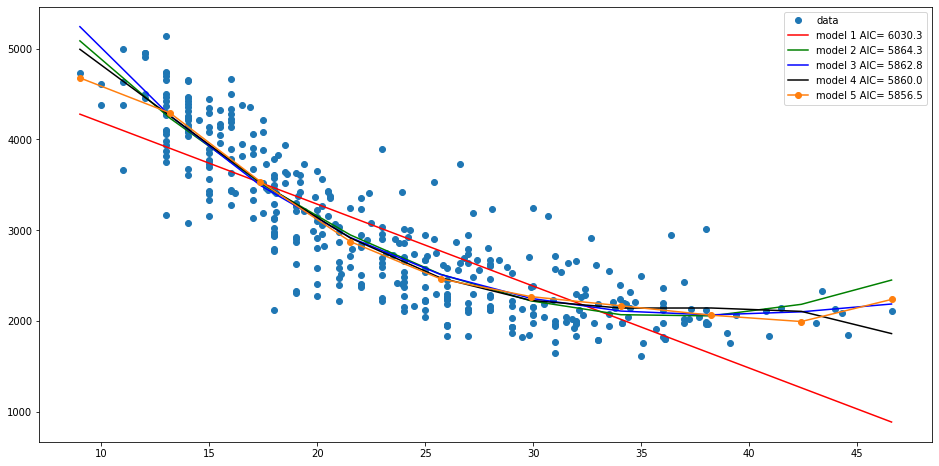

In [6]:
x_predict = np.linspace(x.min(),x.max(),10)

X_pred = sm.add_constant(x_predict) # adds a first column to add an intercept (beta_0) to our model

X2_pred = np.column_stack((x_predict, x_predict**2))
X2_pred = sm.add_constant(X2_pred) # adds a first column to add an intercept (beta_0) to our model
X3_pred = np.column_stack((x_predict, x_predict**2,x_predict**3))
X3_pred = sm.add_constant(X3_pred) # adds a first column to add an intercept (beta_0) to our model
X4_pred = np.column_stack((x_predict, x_predict**2,x_predict**3,x_predict**4))
X4_pred = sm.add_constant(X4_pred) # adds a first column to add an intercept (beta_0) to our model
X5_pred = np.column_stack((x_predict, x_predict**2,x_predict**3,x_predict**4,x_predict**5))
X5_pred = sm.add_constant(X5_pred) # adds a first column to add an intercept (beta_0) to our model


y1_predict = model1.predict(X_pred)
y2_predict = model2.predict(X2_pred)
y3_predict = model3.predict(X3_pred)
y4_predict = model4.predict(X4_pred)
y5_predict = model5.predict(X5_pred)


fig, ax = plt.subplots(figsize=(16,8))
ax.plot(x, y, 'o', label="data")
ax.plot(x_predict, y1_predict, 'r-', label="model 1 AIC= {:.5}".format(model1.aic))
ax.plot(x_predict, y2_predict, 'g-', label="model 2 AIC= {:.5}".format(model2.aic))
ax.plot(x_predict, y3_predict, 'b-', label="model 3 AIC= {:.5}".format(model3.aic))
ax.plot(x_predict, y4_predict, 'k-', label="model 4 AIC= {:.5}".format(model4.aic))
ax.plot(x_predict, y5_predict, 'o-', label="model 5 AIC= {:.5}".format(model5.aic))


ax.legend()
plt.show()
